1. Importing Required Libraries

In [6]:
import numpy as np 
print("Importing Numpy")
print("Importing Pandas")
import pandas as pd 
print("Importing Matplotlib")
from matplotlib import pyplot as plt
print("Importing Seaborn")
import seaborn as sns
print("Importing Statsmodels")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Importing Numpy
Importing Pandas
Importing Matplotlib
Importing Seaborn
Importing Statsmodels


2. Importing the dataset

In [7]:
df = pd.read_csv('../dataset/Dataset_1.csv',sep=';')
df.head()

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


3. Preparation of Date Time Column

In [8]:
df['Date'] =  pd.to_datetime(df['Date'],format="%d.%m.%Y %H:%M")

df.set_index(df['Date'],inplace=True)

df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
Date,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


4. Calculating the total oder amount

In [9]:
df['Price'] = df['Price'].str.replace(',', '.')
df['Total'] = df['Quantity'].astype(float) * df['Price'].astype(float)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total
Date,,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


5. Calculating the total sales per day

In [10]:
daily_sales = df.groupby(df.index.date)['Total'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales.head()

,Date,Sales
0,2010-12-01,58405.41
1,2010-12-02,47725.88
2,2010-12-03,44366.86
3,2010-12-05,31774.95
4,2010-12-06,53647.96


6. Plotting the total sales per day

<AxesSubplot:ylabel='Sales'>

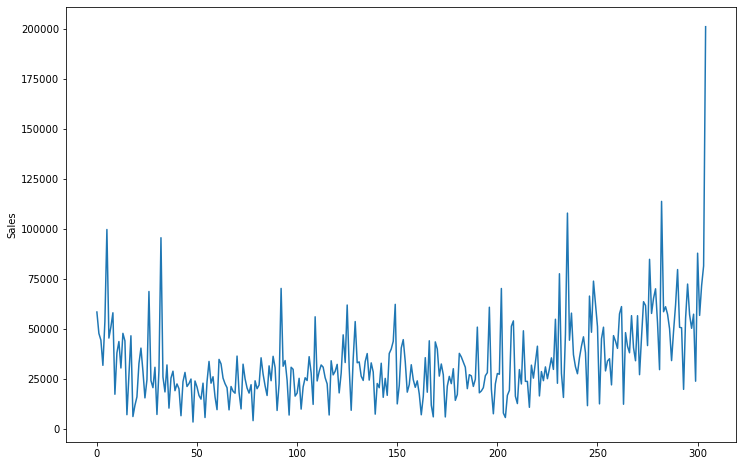

In [11]:

plt.figure(figsize=(12,8))
sns.lineplot(data=daily_sales, x=daily_sales.index, y=daily_sales.Sales)

7. Function to check stationarity

In [12]:
def check_stationarity(df , param):
    stationarity=False
    adfTest = adfuller(df[param], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(stats)
    for key,values in adfTest[4].items():
        print("Criticallity ",key," : ",values)
        if(float(values)>float(adfTest[0])):
            stationarity=True
            break
    if(stationarity==False and adfTest[1]<=0.05):
        stationarity=True
    df['rollMean'] = df[param].rolling(window=7).mean()
    df['rollStd']= df[param].rolling(window=7).std()
    plt.figure(figsize=(15,10))
    sns.lineplot(data=df, x=df.index, y=df[param])
    sns.lineplot(data=df,x=df.index, y=df.rollMean)
    sns.lineplot(data=df,x=df.index, y=df.rollStd)
    print("Stationarity: ",stationarity)
    return stationarity

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

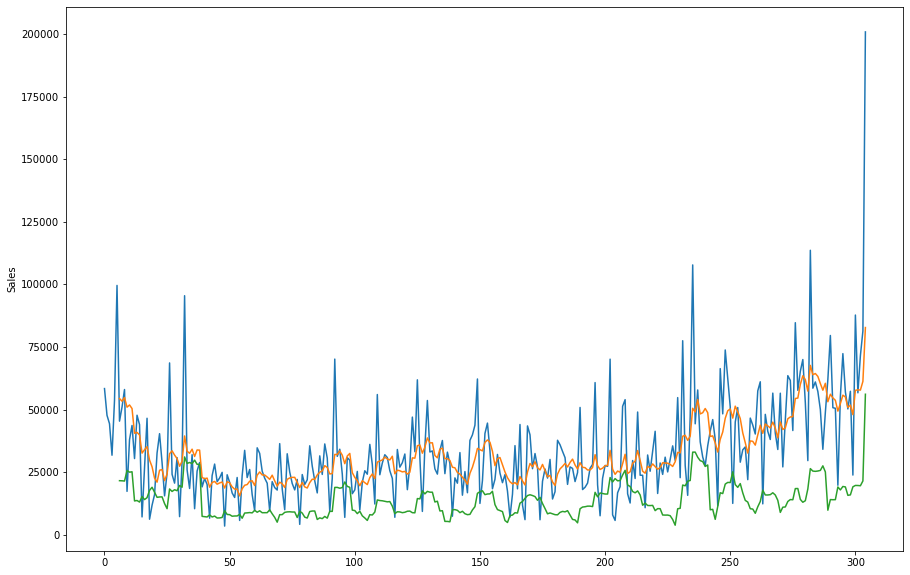

In [13]:
check_stationarity(daily_sales,'Sales')

8. Making the time series stationary using shift

Test Statistic                -6.295691e+00
p-value                        3.510548e-08
Lags Used                      1.000000e+01
Number of Observations Used    2.940000e+02
dtype: float64
Criticallity  1%  :  -3.452789844280995
Stationarity:  True


True

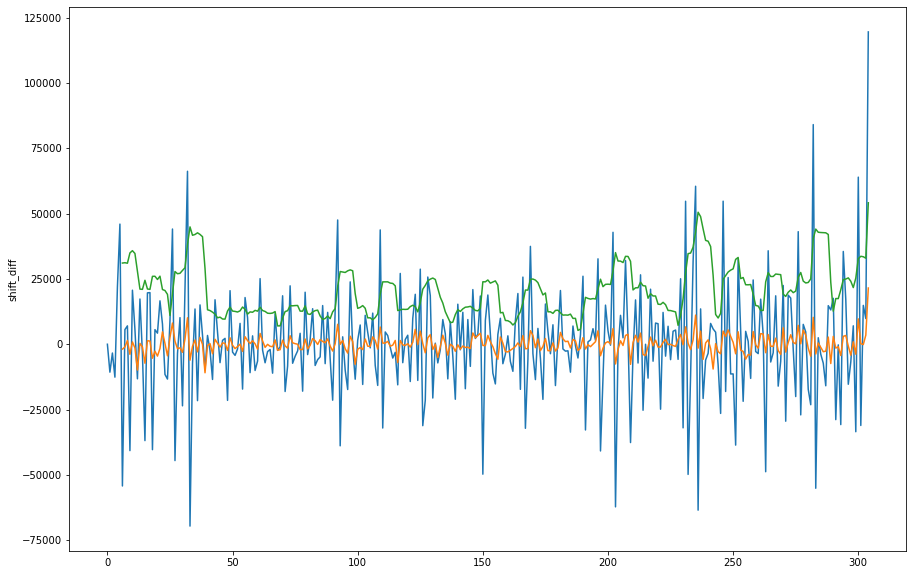

In [14]:
daily_sales['shift']=daily_sales['Sales'].shift()
daily_sales['shift_diff'] = daily_sales['Sales'] - daily_sales['shift'] 
daily_sales['shift_diff'].fillna(0,inplace=True)
check_stationarity(daily_sales,'shift_diff')

9. Making the time series stationary using log

Test Statistic                  -1.094343
p-value                          0.717322
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

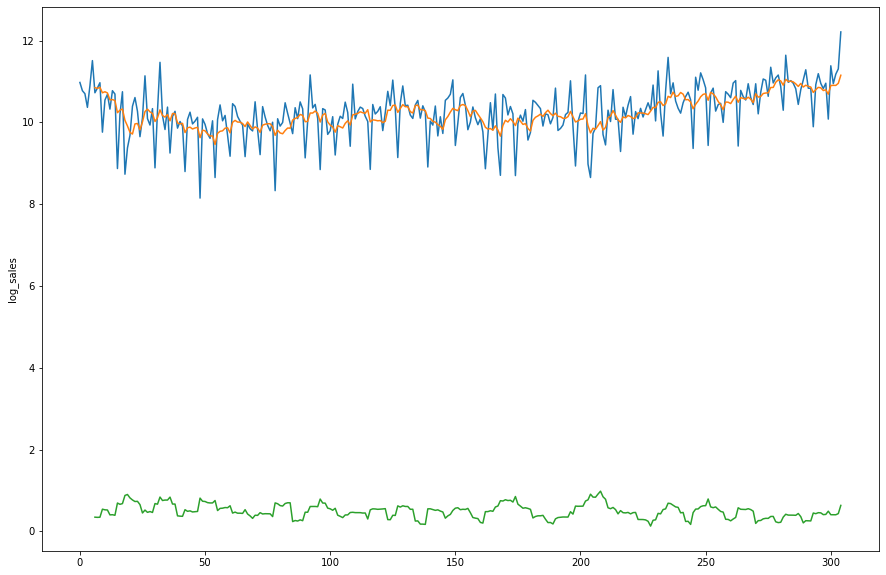

In [15]:
daily_sales['log_sales']=daily_sales['Sales'].apply(lambda x: np.log(x))
check_stationarity(daily_sales,'log_sales')

10. Making the time series stationary using square root

Test Statistic                  -0.496842
p-value                          0.892631
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

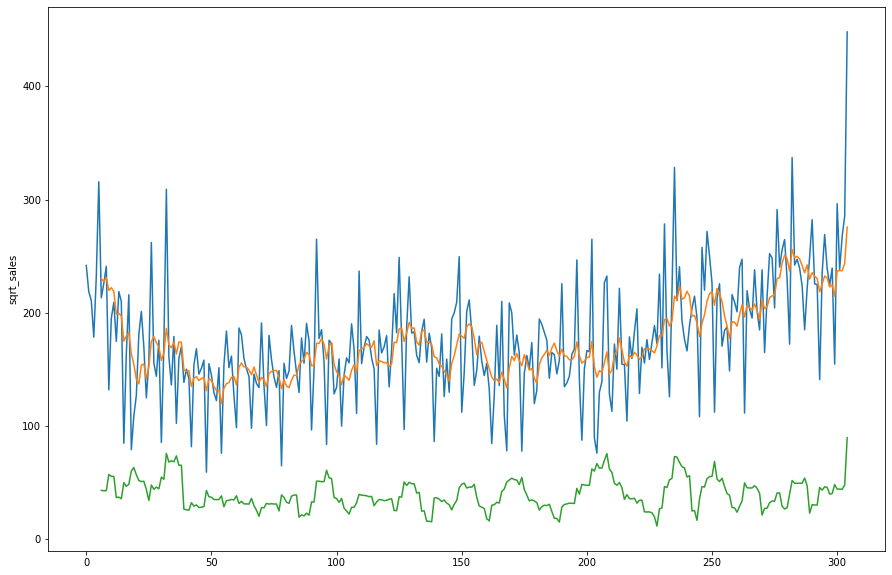

In [16]:
daily_sales['sqrt_sales'] = np.sqrt(daily_sales['Sales'])
check_stationarity(daily_sales,'sqrt_sales')

11. Making the time series stationary using cube root

Test Statistic                  -0.695790
p-value                          0.847837
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

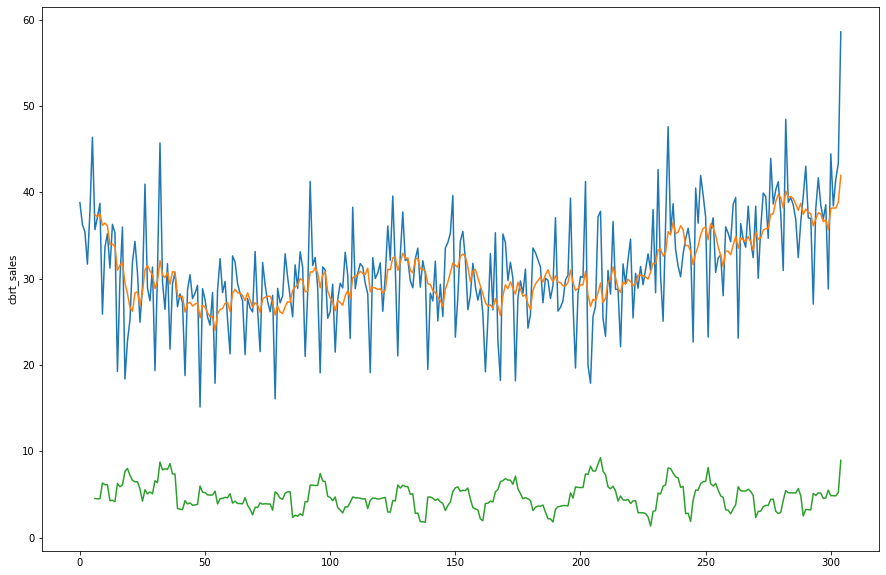

In [17]:
daily_sales['cbrt_sales'] = np.cbrt(daily_sales['Sales'])
check_stationarity(daily_sales,'cbrt_sales')

12. Making the time series stationary using log and square root

Test Statistic                  -1.152969
p-value                          0.693493
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

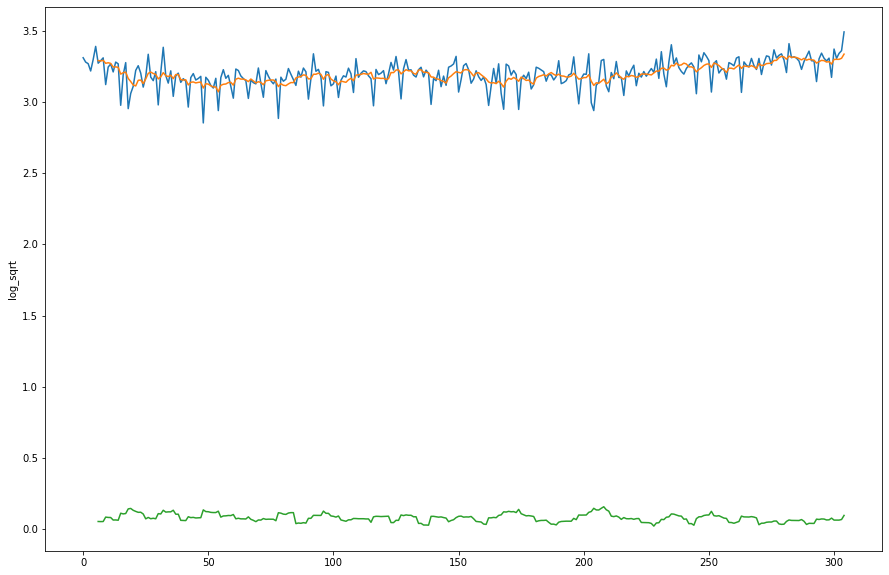

In [18]:
daily_sales['log_sqrt']=daily_sales['log_sales'].apply(lambda x: np.sqrt(x))
check_stationarity(daily_sales,'log_sqrt')

13. Making the time series stationary using log, sqare root and shift

Test Statistic                -8.912007e+00
p-value                        1.097874e-14
Lags Used                      1.000000e+01
Number of Observations Used    2.940000e+02
dtype: float64
Criticallity  1%  :  -3.452789844280995
Stationarity:  True


True

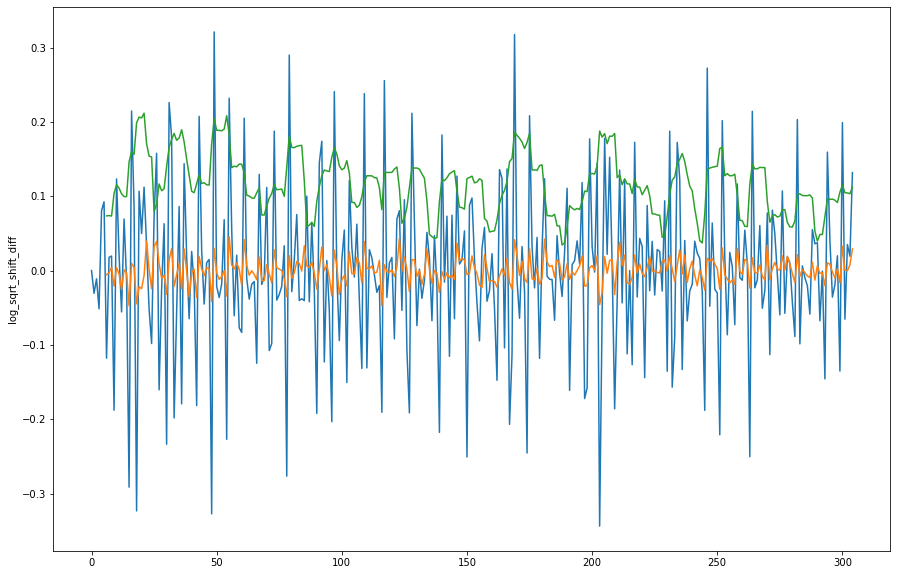

In [19]:
daily_sales['log_sqrt_shift_diff'] = daily_sales['log_sqrt'] - daily_sales['log_sqrt'].shift()
daily_sales['log_sqrt_shift_diff'].dropna(inplace=True)

daily_sales['log_sqrt_shift_diff'].fillna(0,inplace=True)
check_stationarity(daily_sales, 'log_sqrt_shift_diff')



 According to the statistics, the log sqrt shift method is the best method to make the time series stationary.Going for the time series prediction using ARIMA model.

14. Finding the p,d,q values for ARIMA model

Lags :  20
Considering P :  1


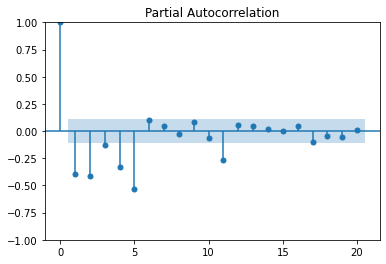

In [20]:
plot_pacf(daily_sales['log_sqrt_shift_diff'], lags=20)
print("Lags : ",20)
print("Considering P : ",1)

Lags :  20
Considering Q :  1


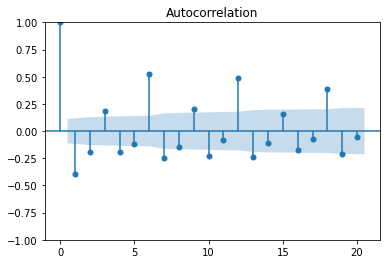

In [21]:
plot_acf(daily_sales['log_sqrt_shift_diff'], lags=20)
print("Lags : ",20)
print("Considering Q : ",1)

In [22]:
print("P : ",1)
print("D : ",1)
print("Q : ",1)


P :  1
D :  1
Q :  1


15. Splitting the data into train and test

In [23]:
train = daily_sales[:int(0.7*(len(daily_sales)))]
test = daily_sales[int(0.7*(len(daily_sales))):]
train.head()

,Date,Sales,rollMean,rollStd,shift,shift_diff,log_sales,sqrt_sales,cbrt_sales,log_sqrt,log_sqrt_shift_diff
0,2010-12-01,58405.41,NaN,NaN,NaN,0.00,10.975164,241.672113,38.798746,3.312878,0.000000
1,2010-12-02,47725.88,NaN,NaN,58405.41,-10679.53,10.773229,218.462537,36.273098,3.282260,-0.030619
2,2010-12-03,44366.86,NaN,NaN,47725.88,-3359.02,10.700248,210.634423,35.401329,3.271123,-0.011136
3,2010-12-05,31774.95,NaN,NaN,44366.86,-12591.91,10.366434,178.255294,31.673420,3.219695,-0.051429
4,2010-12-06,53647.96,NaN,NaN,31774.95,21873.01,10.890199,231.620293,37.715315,3.300030,0.080335


16. Training the ARIMA model

In [24]:
ARIMA(train['Sales'], order=(1, 1, 1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2335.073
Date:                Tue, 26 Mar 2024   AIC                           4676.145
Time:                        00:14:49   BIC                           4686.215
Sample:                             0   HQIC                          4680.215
                                - 213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0924      0.107      0.861      0.389      -0.118       0.303
ma.L1         -0.9329      0.039    -23.729      0.000      -1.010      -0.856
sigma2      2.778e+08   1.08e-10   2.58e+18      0.000    2.78e+08    2.78e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               140.21
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.10
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.21e+33. Standard errors may be unstable.
"""

17. Predicting the results

In [25]:
prediction = ARIMA(train['Sales'], order=(1, 1, 1)).fit().predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
daily_sales['arima_prediction'] = prediction
daily_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Date,Sales,rollMean,rollStd,shift,shift_diff,log_sales,sqrt_sales,cbrt_sales,log_sqrt,log_sqrt_shift_diff,arima_prediction
205,2011-08-15,16776.55,0.018586,0.184209,5718.57,11057.98,9.727737,129.524322,25.599661,3.118932,0.177593,NaN
206,2011-08-16,19239.66,-0.003594,0.170795,16776.55,2463.11,9.864729,138.707101,26.795743,3.140817,0.021885,NaN
207,2011-08-17,51301.92,0.013579,0.180750,19239.66,32062.26,10.845483,226.499272,37.157333,3.293248,0.152432,NaN
208,2011-08-18,53975.08,0.014967,0.180647,51301.92,2673.16,10.896278,232.325375,37.791816,3.300951,0.007703,NaN
209,2011-08-19,16360.10,-0.032219,0.184350,53975.08,-37614.98,9.702601,127.906607,25.386061,3.114900,-0.186051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,87787.26,0.032656,0.115109,23847.89,63939.37,11.382672,296.289149,44.443730,3.373822,0.199006,26885.16498
301,2011-12-06,56713.21,0.000550,0.104757,87787.26,-31074.05,10.945762,238.145355,38.420358,3.308438,-0.065383,26885.16498
302,2011-12-07,71582.27,-0.000233,0.104429,56713.21,14869.06,11.178603,267.548631,41.521065,3.343442,0.035004,26885.16498
303,2011-12-08,81410.86,0.007611,0.103376,71582.27,9828.59,11.307264,285.325884,43.340520,3.362628,0.019186,26885.16498


18. Plotting the results

<AxesSubplot:xlabel='Date', ylabel='Sales'>

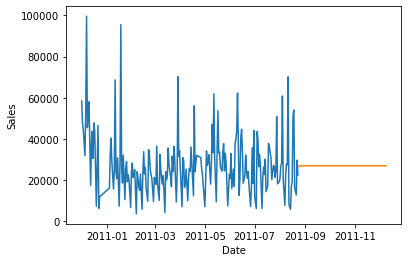

In [26]:
daily_sales['arima_prediction'].dropna()
sns.lineplot(data=daily_sales,x=daily_sales['Date'][:int(0.7*(len(daily_sales)))], y=daily_sales['Sales'][:int(0.7*(len(daily_sales)))])
sns.lineplot(data=daily_sales,x=daily_sales['Date'][int(0.7*(len(daily_sales))):], y=daily_sales['arima_prediction'][int(0.7*(len(daily_sales))):])

19. Finding the Mean Squared Error

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(daily_sales['Sales'][:len(prediction)], prediction)

272066820.4488935

20. Implementing SARIMAX model

In [28]:

SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1,1,1,30)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  213
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -2010.595
Date:                            Tue, 26 Mar 2024   AIC                           4031.189
Time:                                    00:14:56   BIC                           4047.209
Sample:                                         0   HQIC                          4037.683
                                            - 213                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0700      0.147      0.478      0.633      -0.217       0.357
ma.L1         -0.8319      0.076    -10.894      0.000      -0.982      -0.682
ar.S.L30      -0.2608      0.142     -1.838      0.066      -0.539       0.017
ma.S.L30      -0.4496      0.178     -2.530      0.011      -0.798      -0.101
sigma2      3.479e+08   2.35e-10   1.48e+18      0.000    3.48e+08    3.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.15
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               0.85   Skew:                             0.13
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.13e+34. Standard errors may be unstable.
"""

21. Predicting the results

In [29]:
predictions = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1,1,1,30)).fit().predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
daily_sales['sarimax_prediction'] = predictions
daily_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Date,Sales,rollMean,rollStd,shift,shift_diff,log_sales,sqrt_sales,cbrt_sales,log_sqrt,log_sqrt_shift_diff,arima_prediction,sarimax_prediction
205,2011-08-15,16776.55,0.018586,0.184209,5718.57,11057.98,9.727737,129.524322,25.599661,3.118932,0.177593,NaN,NaN
206,2011-08-16,19239.66,-0.003594,0.170795,16776.55,2463.11,9.864729,138.707101,26.795743,3.140817,0.021885,NaN,NaN
207,2011-08-17,51301.92,0.013579,0.180750,19239.66,32062.26,10.845483,226.499272,37.157333,3.293248,0.152432,NaN,NaN
208,2011-08-18,53975.08,0.014967,0.180647,51301.92,2673.16,10.896278,232.325375,37.791816,3.300951,0.007703,NaN,NaN
209,2011-08-19,16360.10,-0.032219,0.184350,53975.08,-37614.98,9.702601,127.906607,25.386061,3.114900,-0.186051,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,87787.26,0.032656,0.115109,23847.89,63939.37,11.382672,296.289149,44.443730,3.373822,0.199006,26885.16498,10471.904140
301,2011-12-06,56713.21,0.000550,0.104757,87787.26,-31074.05,10.945762,238.145355,38.420358,3.308438,-0.065383,26885.16498,25392.884215
302,2011-12-07,71582.27,-0.000233,0.104429,56713.21,14869.06,11.178603,267.548631,41.521065,3.343442,0.035004,26885.16498,26783.662399
303,2011-12-08,81410.86,0.007611,0.103376,71582.27,9828.59,11.307264,285.325884,43.340520,3.362628,0.019186,26885.16498,31708.037751


22. Plotting the results

<AxesSubplot:xlabel='Date', ylabel='Sales'>

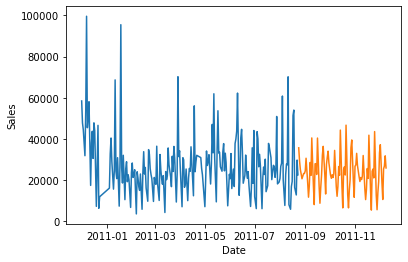

In [30]:
daily_sales['sarimax_prediction'].dropna()
sns.lineplot(data=daily_sales,x=daily_sales['Date'][:int(0.7*(len(daily_sales)))], y=daily_sales['Sales'][:int(0.7*(len(daily_sales)))])
sns.lineplot(data=daily_sales,x=daily_sales['Date'][int(0.7*(len(daily_sales))):], y=daily_sales['sarimax_prediction'][int(0.7*(len(daily_sales))):])

23. Finding the mean squared error

In [31]:
mean_squared_error(daily_sales['Sales'][:len(prediction)], prediction)

prediction = ARIMA(train['log_sqrt_shift_diff'], order=(1, 1, 3)).fit().predict(start=test.index[0], end=test.index[-1], typ='levels')
MSE_Daily = mean_squared_error(daily_sales['log_sqrt_shift_diff'][int(0.7*(len(daily_sales))):], prediction)
print("Mean squared error - daily : ",MSE_Daily)



/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean squared error - daily :  0.00969409814864694


/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


24. Getting the forecast for the next 30 days. Create monthly sales column

In [32]:
# Extract year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month, and calculate the sum of sales
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()

monthly_sales['YearMonth'] = monthly_sales.apply(lambda row: str(int(row['Year'])) + '-' + str(int(row['Month'])), axis=1)


monthly_sales['Total'] = monthly_sales['Total'].astype(float)

25. Plotting monthly sales

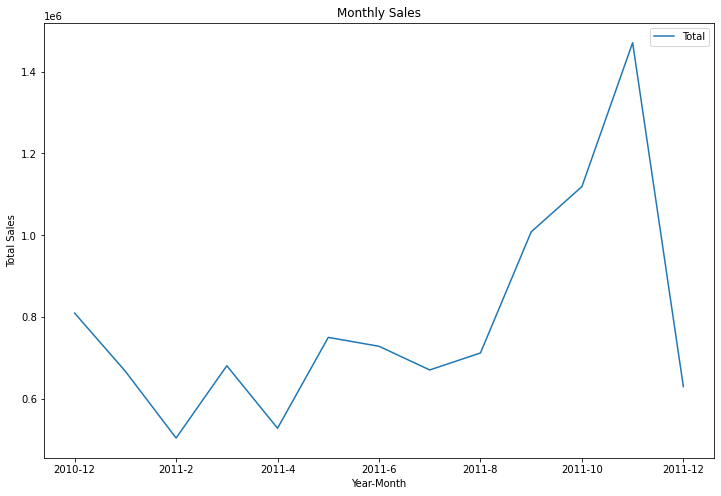

In [33]:
monthly_sales.plot(x='YearMonth', y='Total', kind='line', figsize=(12, 8))
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()


26. Check for stationarity of monthly sales

Test Statistic                 -2.139205
p-value                         0.229045
Lags Used                       0.000000
Number of Observations Used    12.000000
dtype: float64
Criticallity  1%  :  -4.137829282407408
Criticallity  5%  :  -3.1549724074074077
Criticallity  10%  :  -2.7144769444444443
Stationarity:  False


False

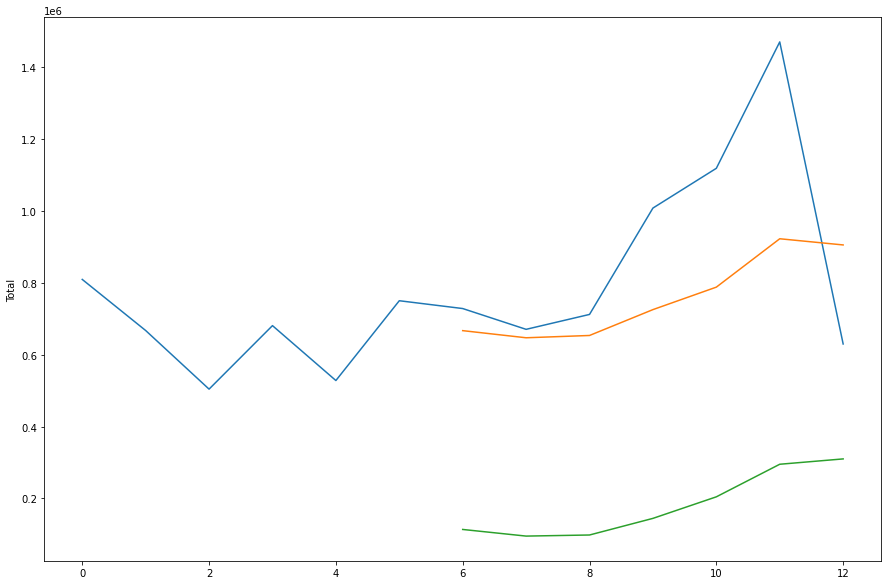

In [34]:
check_stationarity(monthly_sales, 'Total')

27. Making the time series stationary using shift, log and square root

Test Statistic                 -2.120373
p-value                         0.236402
Lags Used                       0.000000
Number of Observations Used    12.000000
dtype: float64
Criticallity  1%  :  -4.137829282407408
Criticallity  5%  :  -3.1549724074074077
Criticallity  10%  :  -2.7144769444444443
Stationarity:  False
Test Statistic                 -3.613866
p-value                         0.005501
Lags Used                       0.000000
Number of Observations Used    12.000000
dtype: float64
Criticallity  1%  :  -4.137829282407408
Criticallity  5%  :  -3.1549724074074077
Stationarity:  True


True

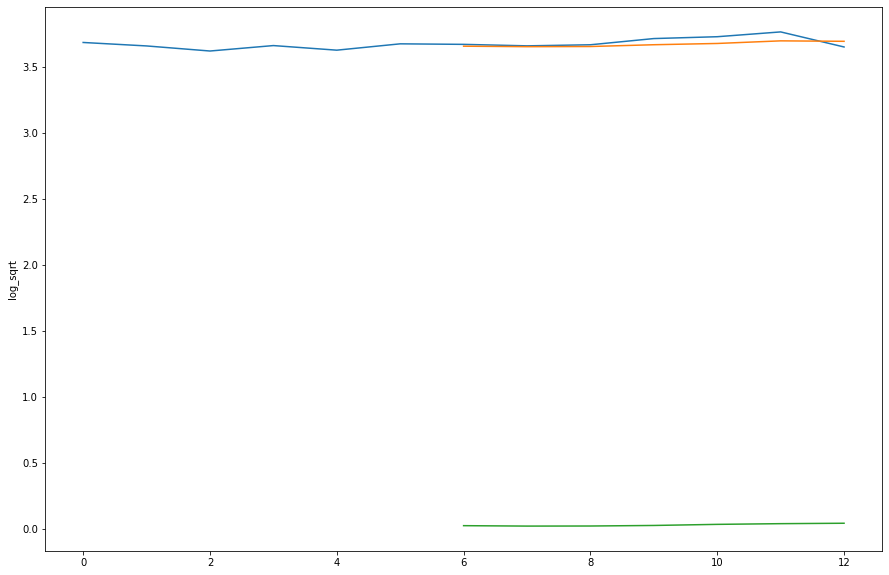

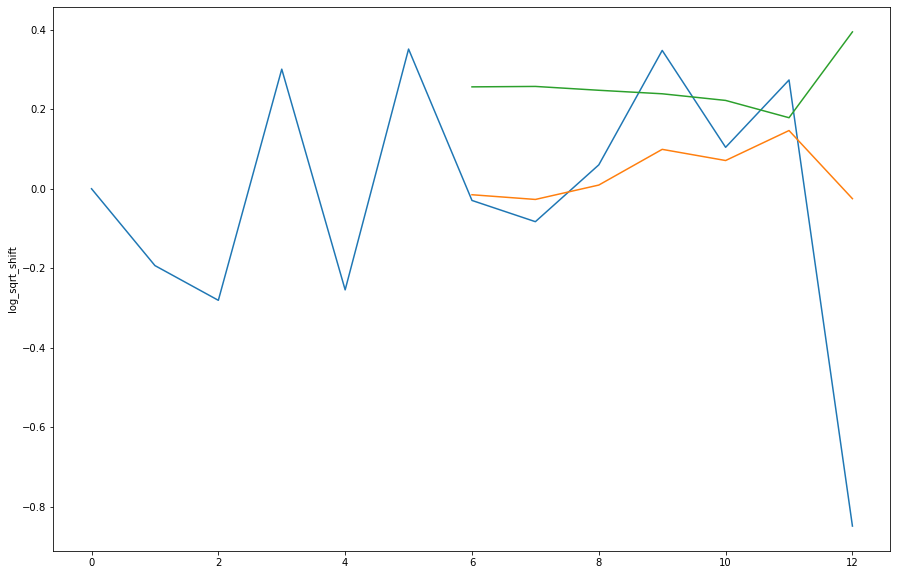

In [35]:
monthly_sales['log_sales'] = monthly_sales['Total'].apply(lambda x: np.log(x))
monthly_sales['log_sqrt']=monthly_sales['log_sales'].apply(lambda x: np.sqrt(x))

check_stationarity(monthly_sales,'log_sqrt')

monthly_sales['log_sqrt_shift'] = monthly_sales['log_sales'] - monthly_sales['log_sales'].shift()
monthly_sales['log_sqrt_shift'].dropna(inplace=True)
monthly_sales['log_sqrt_shift'].fillna(0,inplace=True)
check_stationarity(monthly_sales,'log_sqrt_shift')



28. Finding p,d,q values for ARIMA model

Lags :  12
Considering P :  0


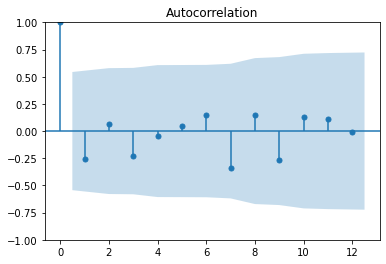

In [36]:
plot_acf(monthly_sales['log_sqrt_shift'], lags=len(monthly_sales)-1)
print("Lags : ", len(monthly_sales)-1)
print("Considering P : ", 0)


Lags :  12
Considering Q :  0


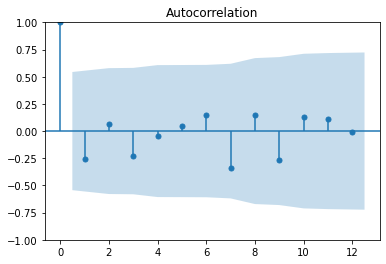

In [37]:
plot_acf(monthly_sales['log_sqrt_shift'], lags=len(monthly_sales)-1)
print("Lags : ",len(monthly_sales)-1)
print("Considering Q : ",0)

In [38]:
print("P : ",0)
print("D : ",1)
print("Q : ",0)

P :  0
D :  1
Q :  0


29. ARIMA model prediction

In [39]:
train_monthly_sales = monthly_sales[:int(0.7*(len(monthly_sales)))]
test_monthly_sales = monthly_sales[int(0.7*(len(monthly_sales))):]

In [40]:

# Ensure train and test datasets have the same length
test_monthly_sales = test_monthly_sales[:len(train_monthly_sales)]

prediction = ARIMA(train_monthly_sales['log_sqrt_shift'], order=(1, 1, 3)).fit().predict(start=test_monthly_sales.index[0], end=test_monthly_sales.index[-1], typ='levels')
MSE_Monthly = mean_squared_error(monthly_sales['log_sqrt_shift'][int(0.7*(len(monthly_sales))):], prediction)
print("Mean squared error - monthly : ",MSE_Monthly)


Mean squared error - monthly :  0.26170203805351294


/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [43]:
prediction = ARIMA(train_monthly_sales['Total'], order=(1, 1, 3)).fit().predict(start=test_monthly_sales.index[0], end=test_monthly_sales.index[-1], typ='levels')
monthly_sales['arima_prediction'] = prediction
monthly_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Year,Month,Total,YearMonth,rollMean,rollStd,log_sales,log_sqrt,log_sqrt_shift,arima_prediction
0,2010,12,809584.230,2010-12,NaN,NaN,13.604276,3.688397,0.000000,NaN
1,2011,1,667348.270,2011-1,NaN,NaN,13.411067,3.662112,-0.193209,NaN
2,2011,2,504110.560,2011-2,NaN,NaN,13.130551,3.623610,-0.280516,NaN
3,2011,3,680937.780,2011-3,NaN,NaN,13.431226,3.664864,0.300675,NaN
4,2011,4,528064.801,2011-4,NaN,NaN,13.176974,3.630010,-0.254252,NaN
5,2011,5,750270.080,2011-5,NaN,NaN,13.528189,3.678069,0.351214,NaN
6,2011,6,728512.720,2011-6,-0.015074,0.256156,13.498760,3.674066,-0.029428,NaN
7,2011,7,670612.991,2011-7,-0.026904,0.257254,13.415947,3.662779,-0.082813,NaN
8,2011,8,712122.520,2011-8,0.009277,0.247595,13.476005,3.670968,0.060058,NaN
9,2011,9,1008307.912,2011-9,0.099033,0.238757,13.823784,3.718035,0.347779,700004.328128


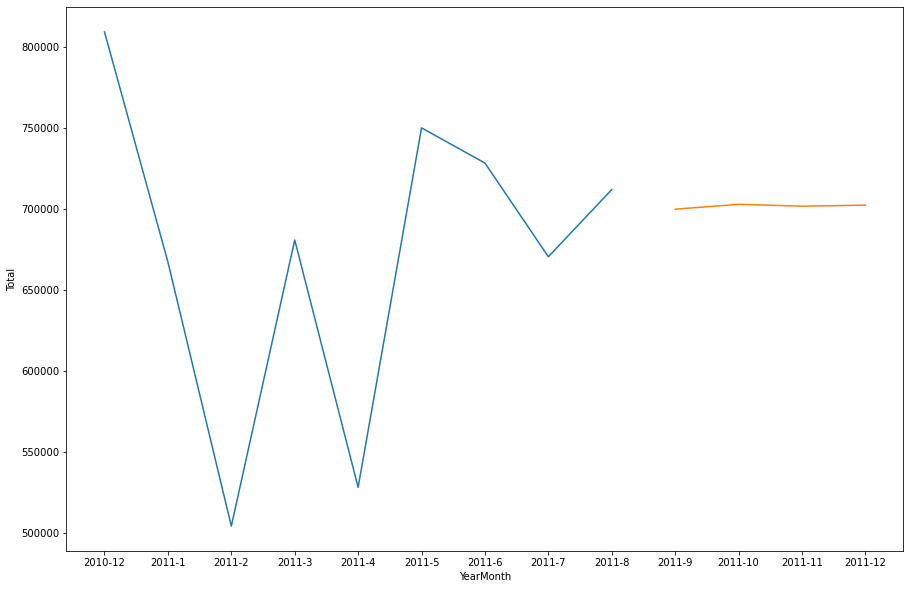

In [44]:
monthly_sales['arima_prediction'].dropna()
plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sales, x=monthly_sales['YearMonth'][:int(0.7*(len(monthly_sales)))], y=monthly_sales['Total'][:int(0.7*(len(monthly_sales)))])
sns.lineplot(data=monthly_sales, x=monthly_sales['YearMonth'][int(0.7*(len(monthly_sales))):], y=monthly_sales['arima_prediction'][int(0.7*(len(monthly_sales))):])
plt.show()


30. Finding mean squared error

In [45]:
mean_squared_error(monthly_sales['Total'][:len(prediction)], prediction)

13211694378.951075

31. Implementing SARIMAX prediction

In [46]:
SARIMAX(train_monthly_sales['Total'], order=(1, 1, 1), seasonal_order=(1,1,1,3)).fit().summary()

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Total   No. Observations:                     9
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 3)   Log Likelihood      -59504366347162.062
Date:                           Tue, 26 Mar 2024   AIC                 119008732694334.125
Time:                                   00:15:35   BIC                 119008732694332.172
Sample:                                        0   HQIC                119008732694328.891
                                             - 9                                          
Covariance Type:                             opg                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5033   1.43e-12  -3.53e+11      0.000      -0.503      -0.503
ma.L1       5.924e-06   1.65e-12   3.59e+06      0.000    5.92e-06    5.92e-06
ar.S.L3    -1.061e-06   1.87e-13  -5.67e+06      0.000   -1.06e-06   -1.06e-06
ma.S.L3    -1.061e-06   1.87e-13  -5.67e+06      0.000   -1.06e-06   -1.06e-06
sigma2         0.0014   5.56e-17   2.45e+13      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.65   Prob(JB):                         0.56
Heteroskedasticity (H):               0.12   Skew:                             1.18
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.18e+18. Standard errors may be unstable.
"""

In [47]:
model_monthly_sales = SARIMAX(train_monthly_sales['Total'], order=(1, 1, 1), seasonal_order=(1,1,1,3)).fit()
predictions = model_monthly_sales.predict(start=test_monthly_sales.index[0], end=test_monthly_sales.index[-1], typ='levels')
monthly_sales['sarimax_prediction'] = predictions
monthly_sales.tail(100)

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Year,Month,Total,YearMonth,rollMean,rollStd,log_sales,log_sqrt,log_sqrt_shift,arima_prediction,sarimax_prediction
0,2010,12,809584.230,2010-12,NaN,NaN,13.604276,3.688397,0.000000,NaN,NaN
1,2011,1,667348.270,2011-1,NaN,NaN,13.411067,3.662112,-0.193209,NaN,NaN
2,2011,2,504110.560,2011-2,NaN,NaN,13.130551,3.623610,-0.280516,NaN,NaN
3,2011,3,680937.780,2011-3,NaN,NaN,13.431226,3.664864,0.300675,NaN,NaN
4,2011,4,528064.801,2011-4,NaN,NaN,13.176974,3.630010,-0.254252,NaN,NaN
5,2011,5,750270.080,2011-5,NaN,NaN,13.528189,3.678069,0.351214,NaN,NaN
6,2011,6,728512.720,2011-6,-0.015074,0.256156,13.498760,3.674066,-0.029428,NaN,NaN
7,2011,7,670612.991,2011-7,-0.026904,0.257254,13.415947,3.662779,-0.082813,NaN,NaN
8,2011,8,712122.520,2011-8,0.009277,0.247595,13.476005,3.670968,0.060058,NaN,NaN
9,2011,9,1008307.912,2011-9,0.099033,0.238757,13.823784,3.718035,0.347779,700004.328128,781311.087636


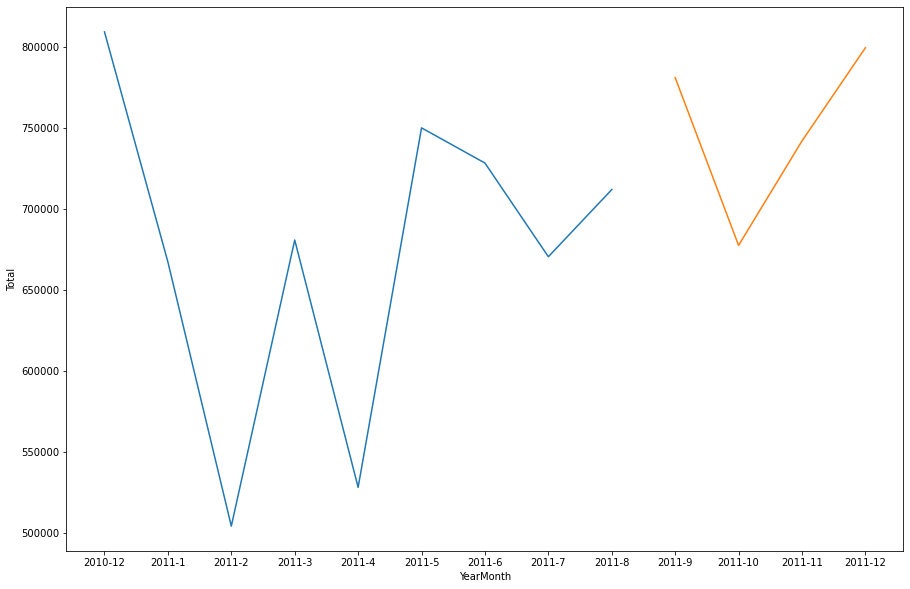

In [48]:
monthly_sales['sarimax_prediction'].dropna()
plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sales,x=monthly_sales['YearMonth'][:int(0.7*(len(monthly_sales)))], y=monthly_sales['Total'][:int(0.7*(len(monthly_sales)))])
sns.lineplot(data=monthly_sales,x=monthly_sales['YearMonth'][int(0.7*(len(monthly_sales))):], y=monthly_sales['sarimax_prediction'][int(0.7*(len(monthly_sales))):])
plt.show()

32. Finding Mean Squared Error

In [49]:
mean_squared_error(monthly_sales['Total'][:len(predictions)], predictions)

17927018913.812042

33. Predicting for future dates

In [50]:
def get_months(start_month, end_month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    start_index = int(start_month) - 1
    end_index = int(end_month)
    month_list = months[start_index:end_index]
    return month_list

    

In [51]:
from tabulate import tabulate
def prediction_for_future(start_month,end_month):
    months = get_months(start_month, end_month)
    print(months)
    predictions = model_monthly_sales.predict(start=start_month, end=end_month, typ='levels')
    print(predictions)
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=predictions,x=months, y=predictions)
    plt.xlabel('Months')
    plt.ylabel('Predicted Sales')
    plt.show()
# Create a list of tuples containing the predictions
    prediction_table = list(zip(months, predictions))

    # Print the table
    print(tabulate(prediction_table, headers=['Month', 'Predicted Sales'], tablefmt='grid'))
        

['Mar', 'Apr', 'May', 'Jun']
3    908902.675387
4    538701.820397
5    370180.807739
6    733100.677226
Name: predicted_mean, dtype: float64


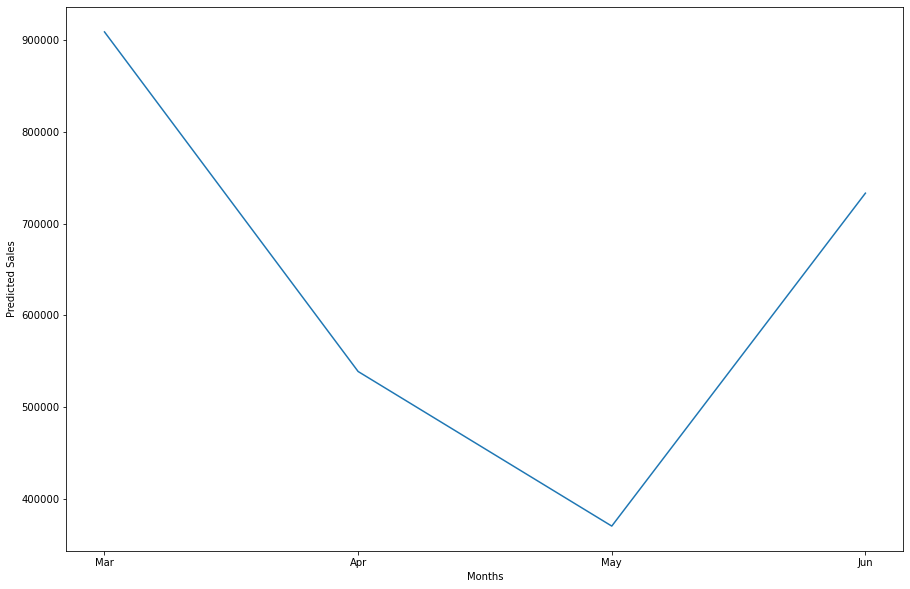

+---------+-------------------+
| Month   |   Predicted Sales |
+=========+===================+
| Mar     |            908903 |
+---------+-------------------+
| Apr     |            538702 |
+---------+-------------------+
| May     |            370181 |
+---------+-------------------+
| Jun     |            733101 |
+---------+-------------------+


In [52]:
prediction_for_future(3,6)